### Prerequisites

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

df = pd.read_csv('car_price_dataset.csv')
# print the row count and column count of the dataset
print(df.shape)
# print the first 5 rows of the dataset
df.head()

(10000, 10)


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


### Step 1. Descriptive Analysis

#### 1.1 the datatypes in the dataset

In [38]:
df["Year"] = pd.to_datetime(df["Year"], format='%Y')
df.info()
min_year = df["Year"].min()
max_year = df["Year"].max()
print(f"Min year: {min_year}, Max year: {max_year}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Brand         10000 non-null  object        
 1   Model         10000 non-null  object        
 2   Year          10000 non-null  datetime64[ns]
 3   Engine_Size   10000 non-null  float64       
 4   Fuel_Type     10000 non-null  object        
 5   Transmission  10000 non-null  object        
 6   Mileage       10000 non-null  int64         
 7   Doors         10000 non-null  int64         
 8   Owner_Count   10000 non-null  int64         
 9   Price         10000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 781.4+ KB
Min year: 2000-01-01 00:00:00, Max year: 2023-01-01 00:00:00


#### 1.2 the description of the dataset(mean, median, mode, std, min, max, etc.)

In [39]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Year,10000,2011-07-18 17:07:52.320000,2000-01-01 00:00:00,2006-01-01 00:00:00,2012-01-01 00:00:00,2017-01-01 00:00:00,2023-01-01 00:00:00,NaN
Engine_Size,10000.0,3.00056,1.0,2.0,3.0,4.0,5.0,1.149324
Mileage,10000.0,149239.1118,25.0,74649.25,149587.0,223577.5,299947.0,86322.348957
Doors,10000.0,3.4971,2.0,3.0,3.0,4.0,5.0,1.110097
Owner_Count,10000.0,2.9911,1.0,2.0,3.0,4.0,5.0,1.422682
Price,10000.0,8852.9644,2000.0,6646.0,8858.5,11086.5,18301.0,3112.59681


#### 1.3 the description of the dataset(mean, median, mode, std, min, max, etc.) with all the columns

In [40]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Brand,10000,10,Ford,1048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,10000,30,Accord,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,10000,NaN,NaN,NaN,2011-07-18 17:07:52.320000,2000-01-01 00:00:00,2006-01-01 00:00:00,2012-01-01 00:00:00,2017-01-01 00:00:00,2023-01-01 00:00:00,NaN
Engine_Size,10000.0,NaN,NaN,NaN,3.00056,1.0,2.0,3.0,4.0,5.0,1.149324
Fuel_Type,10000,4,Electric,2625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,10000,3,Manual,3372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,10000.0,NaN,NaN,NaN,149239.1118,25.0,74649.25,149587.0,223577.5,299947.0,86322.348957
Doors,10000.0,NaN,NaN,NaN,3.4971,2.0,3.0,3.0,4.0,5.0,1.110097
Owner_Count,10000.0,NaN,NaN,NaN,2.9911,1.0,2.0,3.0,4.0,5.0,1.422682
Price,10000.0,NaN,NaN,NaN,8852.9644,2000.0,6646.0,8858.5,11086.5,18301.0,3112.59681


#### 1.4. Number of different categories


In [41]:
df.nunique()

Brand             10
Model             30
Year              24
Engine_Size       41
Fuel_Type          4
Transmission       3
Mileage         9854
Doors              4
Owner_Count        5
Price           6661
dtype: int64

### Conclusion
The dataset has **10** columns and **10000** rows.

There are no missing values in the dataset. It contains both numerical and categorical columns.

**6** columns are numerical(**4** integer, **1** float and **1** datatime) and **4** columns are categorical.

Time range is from **2000** to **2023**.

### 1.5. Graphics representation of numerical variables

Histograms, line graphs, bars or sectors, among others, to observe the behavior of the data distribution.


In [42]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("\nNumerical Variables:")
print(num_cols)

cat_cols=df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Variables:")
print(cat_cols)


Numerical Variables:
['Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price']

Categorical Variables:
['Brand', 'Model', 'Fuel_Type', 'Transmission']


#### 1.5.1. EDA Numerical Variables Univariate Analysis


Engine_Size


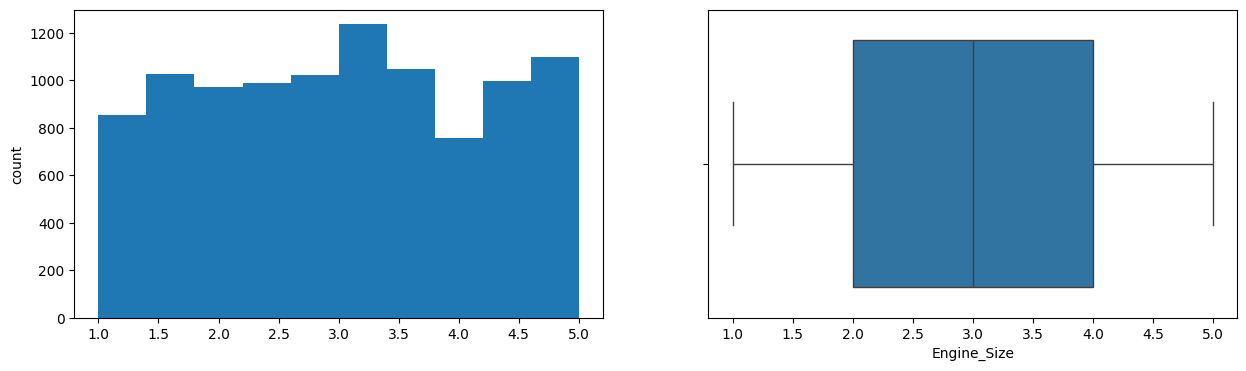

Mileage


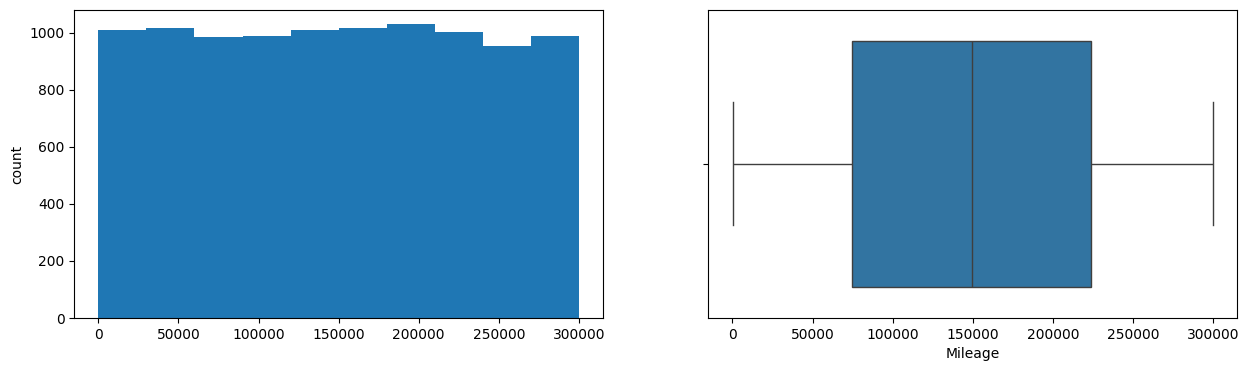

Doors


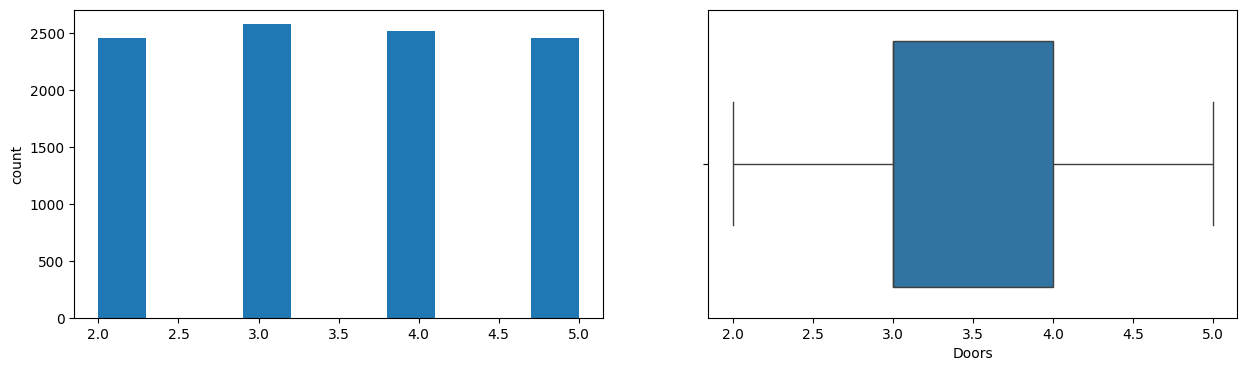

Owner_Count


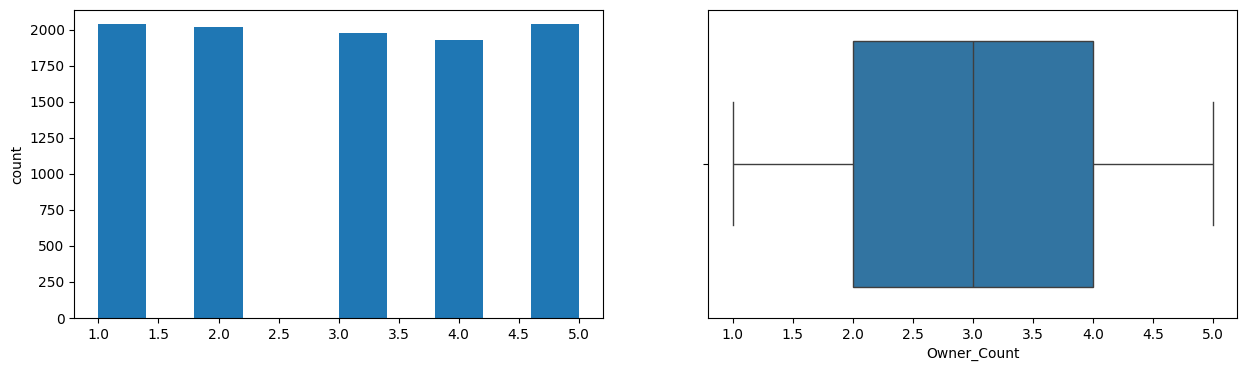

Price


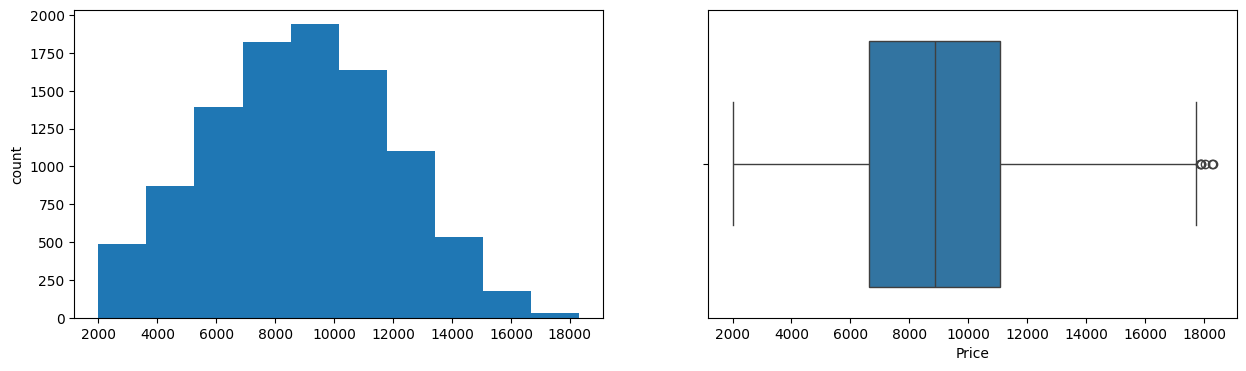

In [43]:

for col in num_cols:
    print(col)
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)  # Histogram
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])  # Boxplot
    plt.show()

Engine_Size


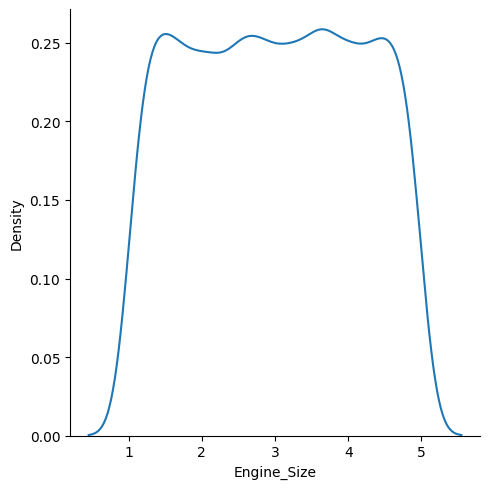

Mileage


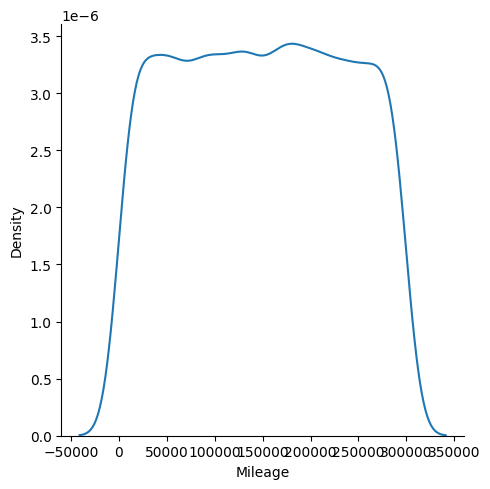

Doors


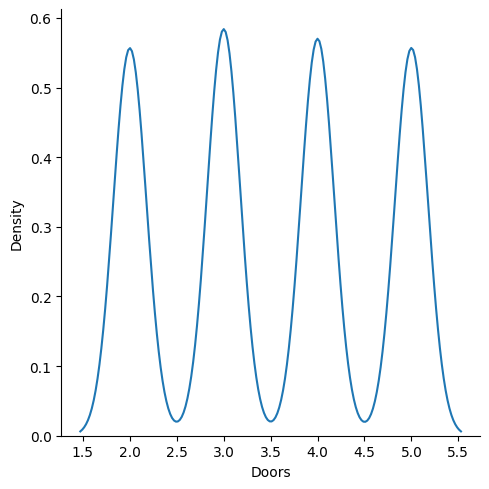

Owner_Count


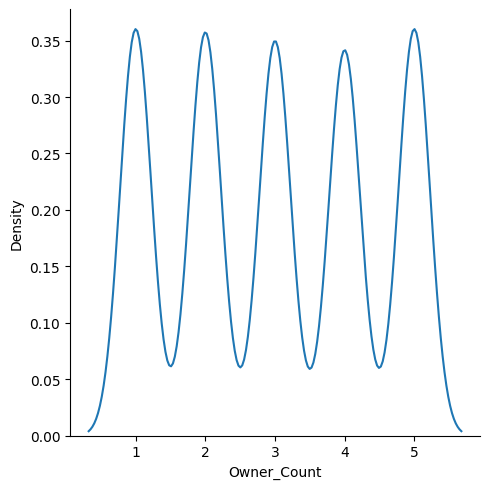

Price


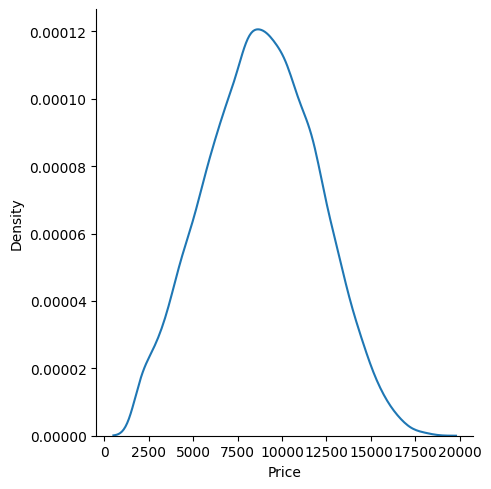

In [44]:
# Density Distribution plot (kind="ecdf")

for col in num_cols:
    print(col)
    sns.displot(data=df[col], kind="kde") 
    plt.show()

#### Conclusions

the nuremical variables are fine, there are no outliers, the data is well distributed with the slight exception of the 'price' variable, which has a slight skew to the left.

#### 1.5.2. EDA Categorical Variables Univariate Analysis

Brand


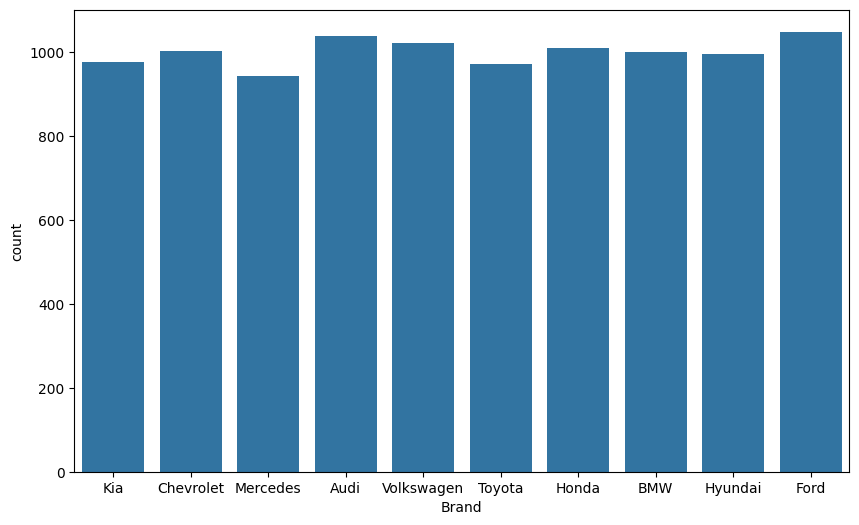

Fuel_Type


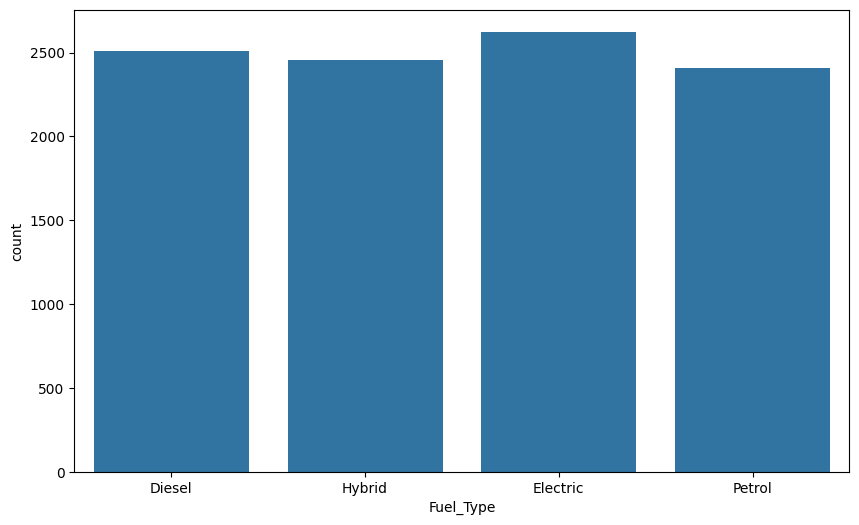

Transmission


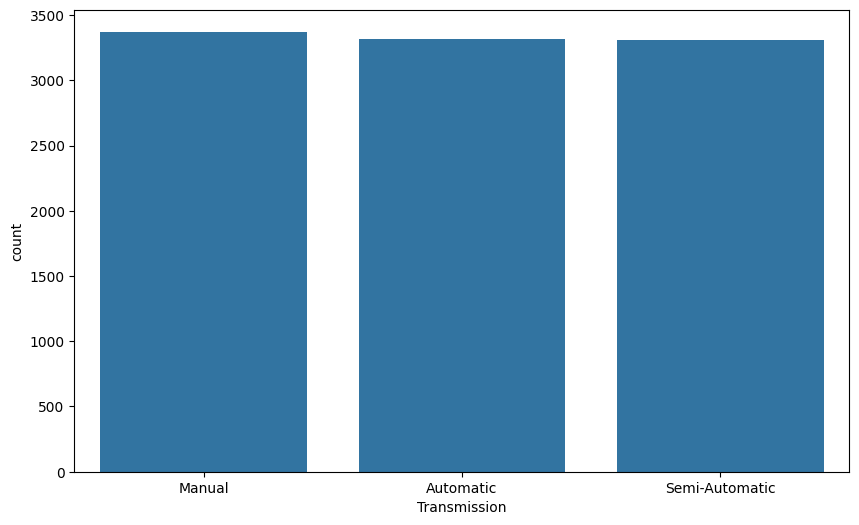

Model


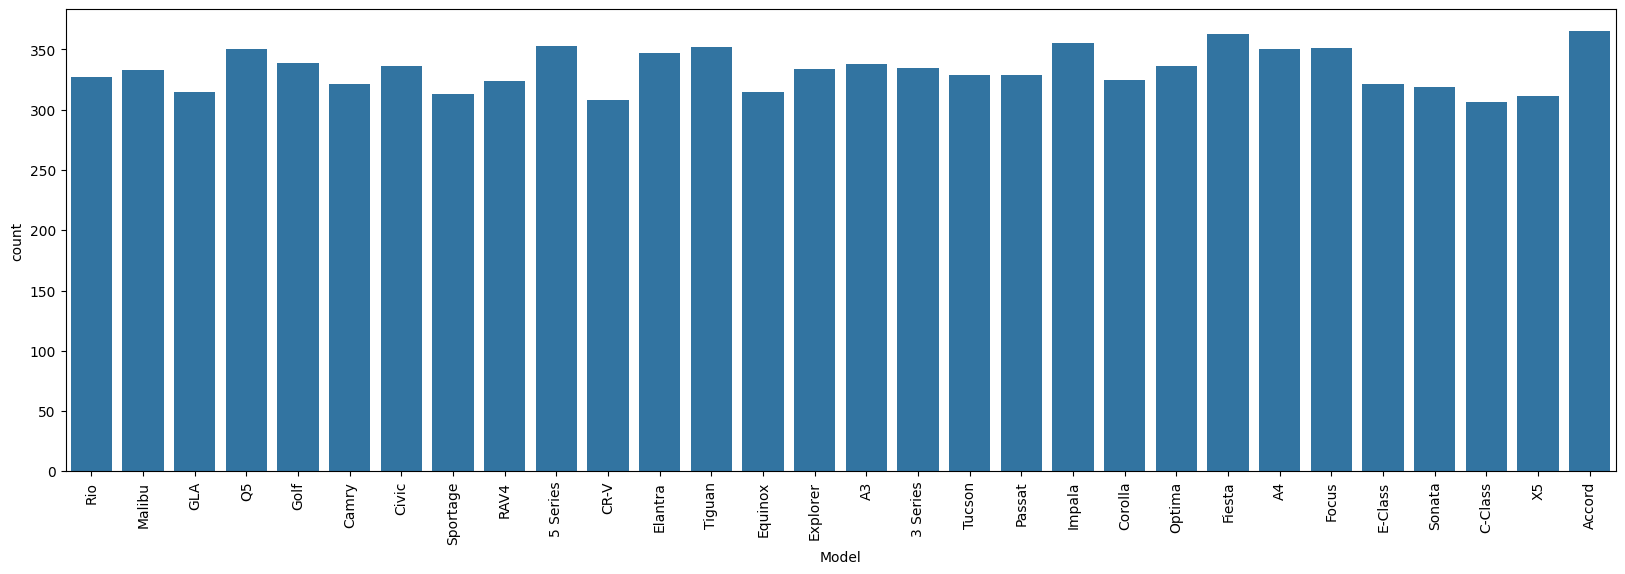

In [46]:
#Bar plot for categorical variables
for col in cat_cols:
    if col == 'Model':
        continue
    print(col)
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.show()

#Bar plot for model (3 plots for it)
print("Model")
plt.figure(figsize=(20, 6))
sns.countplot(x='Model', data=df)
plt.xticks(rotation=90)
plt.show()

#### Conclusions

As we can see the categorical variables are well distributed, there are no outliers, the data is well distributed.

#### 1.5.3. EDA Numerical Variables Bivariate Analysis

<Figure size 1300x1700 with 0 Axes>

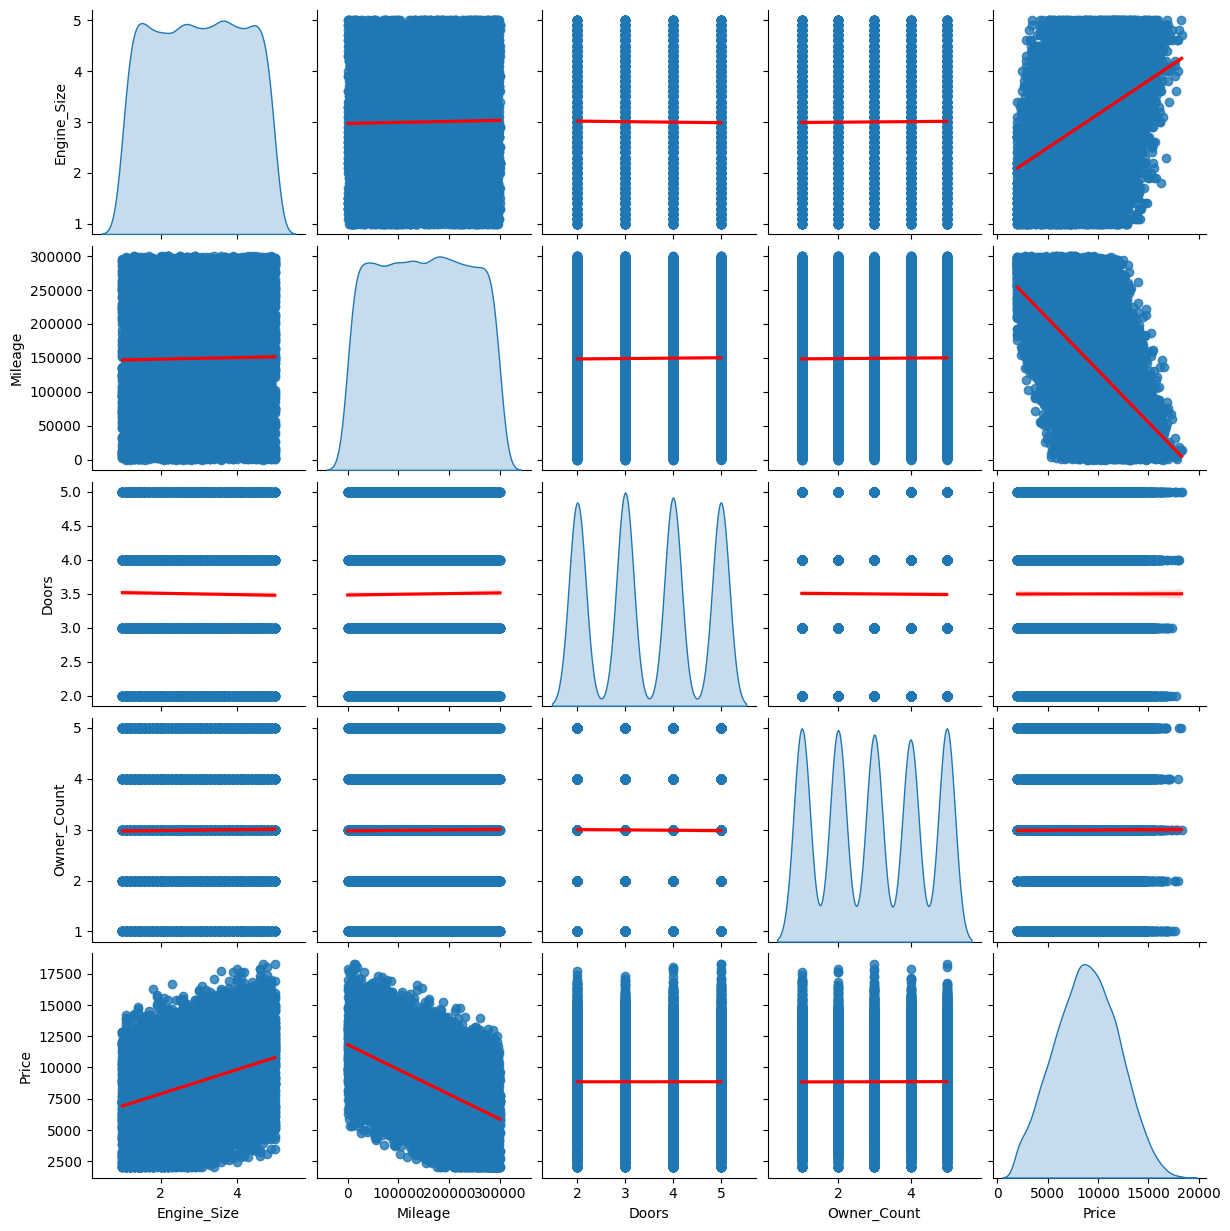

In [50]:
plt.figure(figsize=(13,17))
sns.pairplot(data=df, kind='reg', diag_kind='kde',
             plot_kws={'line_kws':{'color':'red'}})
plt.show()

#### Conclusions

We can see there is a positive correletion between the price and engine_size and negative correlation between price and mileage.

#### 1.5.4 Heatmap of the correlation matrix

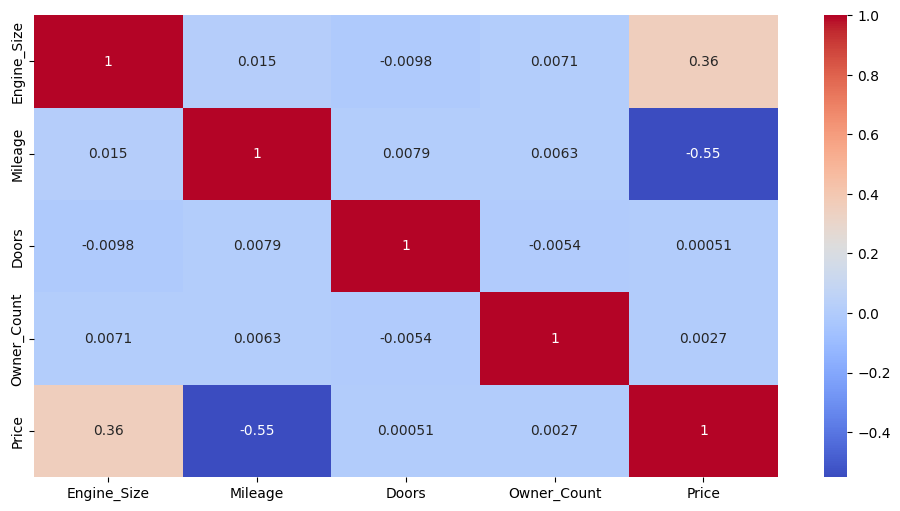

In [49]:
#Correlation matrix heatmap
df_for_corr = df.select_dtypes(include=np.number)
plt.figure(figsize=(12, 6))
sns.heatmap(df_for_corr.corr(), annot=True, cmap='coolwarm')
plt.show()